# OASIS INFOBYTE DATASCIENCE INTERNSHIP

## TASK 1- Email Spam Detection



### Akshay Saini

*EMAIL SPAM DETECTION WITH MACHINE LEARNING*

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started!

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import io

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

###  Classification of Data


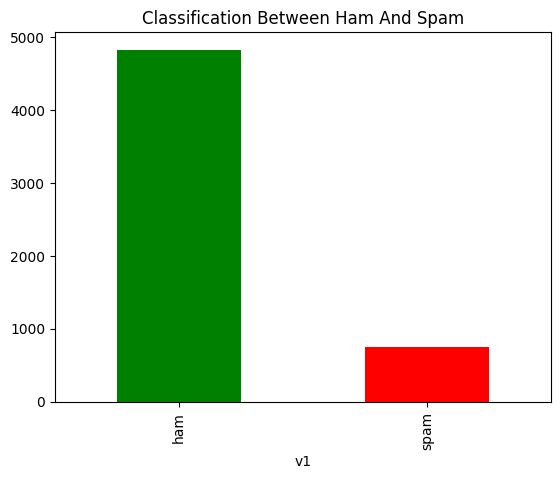

In [9]:
df_classify=pd.value_counts(df["v1"])
df_classify.plot(kind="bar",color= ["green", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

### Simplification of Data
#### Label Encoding 
 As the output is a classification of strings we need to import Label Encoder to make that numeric

In [12]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
df['v1']= label_encoder.fit_transform(df['v1'])

In [13]:
df['v1'].unique()

array([0, 1])

"ham" : 0, 
"spam" : 1

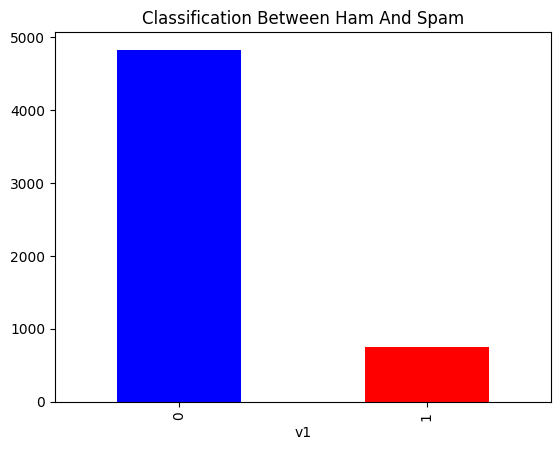

In [15]:

df_classify=pd.value_counts(df["v1"])
df_classify.plot(kind="bar",color= ["blue", "red"])
plt.title("Classification Between Ham And Spam")
plt.show()

### Model Training 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df['v2'], df['v1'],test_size=0.3, random_state=42 )
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train_new= cv.fit_transform(x_train)

In [17]:
x_train

708     To review and KEEP the fantastic Nokia N-Gage ...
4338                   Just got outta class gonna go gym.
5029    Is there coming friday is leave for pongal?do ...
4921    Hi Dear Call me its urgnt. I don't know whats ...
2592    My friend just got here and says he's upping h...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: v2, Length: 3900, dtype: object

In [18]:
y_train

708     1
4338    0
5029    0
4921    0
2592    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: v1, Length: 3900, dtype: int32

###  Model Evaluation

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression    

y_train=y_train.astype(int)
x_train_new=x_train_new.astype(int)
x_train_new
y_test=y_test.astype(int)
     


lr= LogisticRegression()
lr.fit(x_train_new, y_train)
lr_pred= lr.predict(cv.transform(x_test))
lr_cm= confusion_matrix(y_test, lr_pred)
     

In [20]:
f1_score(y_test, lr_pred)

0.9090909090909092

This model gives **90.90%** accuracy.